### Determining onset of Feb 2021 CAO and Hit Percentages for the Onset

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from metpy.units import units
from metpy import calc as mpcalc
import math
import netCDF4
from netCDF4 import Dataset
from datetime import datetime, date, timedelta

Importing in era-i, era-5, and S2S model data that's been averaged over a lat-lon. All data is at 00Z and 1000hPa

In [47]:
ct_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box1_data/llmn_t/ct_llmn_t.nc")
stdvt_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box1_data/llmn_t/stdvt_llmn_t.nc")
rt1_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box1_data/llmn_t/realt_jan.nc")
rt2_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box1_data/llmn_t/realt_feb.nc")

#Reading in llmn_t Datasets made in rd_data.ipynb script (odd=hightop, even=lowtop)
t_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box1_data/llmn_t/ECMWF_llmn_t.nc")
t2_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box1_data/llmn_t/ECCC_llmn_t.nc")
t3_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box1_data/llmn_t/UKMO_llmn_t.nc")
t4_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box1_data/llmn_t/CMA_llmn_t.nc")
t5_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box1_data/llmn_t/JMA_llmn_t.nc")
t6_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box1_data/llmn_t/CNR_llmn_t.nc")

In [3]:
#Joining together the era-5 data in order to have January and February data together in one dataset
rt_llmn_ds = xr.concat([rt1_llmn_ds,rt2_llmn_ds], dim='time')

In [4]:
#Creating variables for the step and date of forecast
step = t_llmn_ds.step["step.days"] #<-- days forecasted out (47)
fd = t_llmn_ds.date["date.dayofyear"] #<--day of forecast(8)
step2 = t2_llmn_ds.step["step.days"] #<-- days forecasted out (32)
fd2 = t2_llmn_ds.date["date.dayofyear"] #<--day of forecast(4)
step3 = t3_llmn_ds.step["step.days"] 
fd3 = t3_llmn_ds.date["date.dayofyear"]
step4 = t4_llmn_ds.step["step.days"] 
fd4 = t4_llmn_ds.date["date.dayofyear"]
step5 = t5_llmn_ds.step["step.days"] 
fd5 = t5_llmn_ds.date["date.dayofyear"]
step6 = t6_llmn_ds.step["step.days"]
fd6 = t6_llmn_ds.date["date.dayofyear"]

#Creating time and number variables
time = ct_llmn_ds['time']
rt_time = rt_llmn_ds.time['time.dayofyear']
n1 = t_llmn_ds['number'].to_numpy()
n2 = t2_llmn_ds['number'].to_numpy()
n3 = t3_llmn_ds['number'].to_numpy()
n4 = t4_llmn_ds['number'].to_numpy()
n5 = t5_llmn_ds['number'].to_numpy()
n6 = t6_llmn_ds['number'].to_numpy()

In [5]:
#Creating data array of forecast day and step
doy1 = fd + step
doy2 = fd2 + step2
doy3 = fd3 + step3
doy4 = fd4 + step4
doy5 = fd5 + step5
doy6 = fd6 + step6

In [6]:
#This cell is testing whether or not I can join the DOY data array to the dataset
#test2 = anom_t.expand_dims('doy')
#test2 = test2.assign_coords(doy = doy1)
#test2 = test2.drop_vars(('time', 'hour', 'lev'))
#test2

Following cell is making the climo (era-i) data's coordinates match the model data

In [7]:
#Assigning number to climo lat/lon means
ct1_match = ct_llmn_ds.assign_coords(number=('number', n1))
ct2_match = ct_llmn_ds.assign_coords(number=('number', n2))
ct3_match = ct_llmn_ds.assign_coords(number=('number', n3))
ct4_match = ct_llmn_ds.assign_coords(number=('number', n4))
ct5_match = ct_llmn_ds.assign_coords(number=('number', n5))
ct6_match = ct_llmn_ds.assign_coords(number=('number', n6))

#Giving climo data forecast days and steps
ct1_match = ct1_match.sel(time=doy1)
ct2_match = ct2_match.sel(time=doy2)
ct3_match = ct3_match.sel(time=doy3)
ct4_match = ct4_match.sel(time=doy4)
ct5_match = ct5_match.sel(time=doy5)
ct6_match = ct6_match.sel(time=doy6)
ct_rt_match = ct_llmn_ds.sel(time=rt_time)
stdvt_match = stdvt_llmn_ds.sel(time=rt_time)

In [8]:
stdvt_match

<xarray.Dataset>
Dimensions:  (time: 59)
Coordinates:
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 55.0 56.0 57.0 58.0 59.0
    hour     float64 ...
    lev      int32 ...
    level    int32 1000
Data variables:
    t        (time) float64 ...

In [9]:
ct2_match

<xarray.Dataset>
Dimensions:  (date: 4, step: 32, number: 20)
Coordinates:
    time     (date, step) float64 8.0 9.0 10.0 11.0 12.0 ... 57.0 58.0 59.0 60.0
    hour     float64 ...
    lev      int32 ...
  * number   (number) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
    level    int32 1000
  * date     (date) datetime64[ns] 2021-01-07 2021-01-14 2021-01-21 2021-01-28
  * step     (step) timedelta64[ns] 1 days 2 days 3 days ... 31 days 32 days
Data variables:
    t        (date, step) float64 ...

Calculating the temperature anomalies for the model data and the era-5 data

In [10]:
#Calculating Mean Area Temp Anoms
anom_t = t_llmn_ds - ct1_match
anom_t2 = t2_llmn_ds - ct2_match
anom_t3 = t3_llmn_ds - ct3_match
anom_t4 = t4_llmn_ds - ct4_match
anom_t5 = t5_llmn_ds - ct5_match
anom_t6 = t6_llmn_ds - ct6_match
anom_rt = rt_llmn_ds.t.values - ct_rt_match.t.values

In [11]:
#Era-5 data is weird so, I'm making the actual anomalies back into xarray
anom_rt_ds = xr.DataArray(data=anom_rt, dims=["time"], coords=dict(time=rt_time),
                        attrs=dict(description="Temperature Anomaly", units="Kelvin"),)

Below are a couple of plots where I'm just playing with the data.

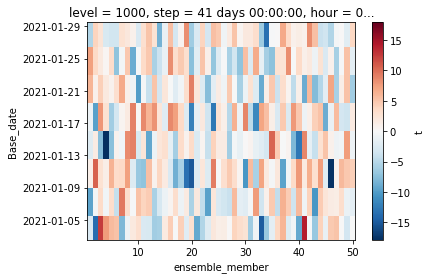

In [12]:
anom_t.sel(step=anom_t.step.dt.days == 41).t.plot()

In [13]:
ens_anom_t.isel(date=0).t.plot() + ens_anom_t.isel(date=1).t.plot()

NameError: name 'ens_anom_t' is not defined

In [ ]:
for m in range(0,2,1):
    for n in range(0,8,1):
#    at1_plt = anom_t.loc[dict(date=7,number=m)]
    #print(u_data_mem)
    # Specify how our lines should look
    #colorR = (m+2)/ 15.
#    ax.plot(u_data_mem.time, u_data_mem.values, color=(colorR,.2,1-colorR,), label='Mem '+str(m))
        anom_t.isel(number=m,date=n).t.plot()

In [ ]:
rt_llmn_ds.t.plot()
plt.title('Temperature Jan&Feb 2021')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')

In [ ]:
#Plotting the actual temperature anomalies
anom_rt_ds.plot(color='purple')
plt.grid(True)
plt.title('ERA5 Temperature Anomalies Jan & Feb 2021')
plt.xlabel('Day of Year')
plt.ylabel('Temperature Anomalies (K)')
fig = mlp.pyplot.gcf()
fig.set_size_inches(10, 3)

Determining the onset and length of the CAO which was determined to be Feb 7th-19th

In [ ]:
time_of_CAO = anom_rt_ds < -.75* stdvt_match
time_of_CAO

Creating date variable in order to select the day I want (February 7th)

In [ ]:
dateyouwant = datetime(2021, 2, 7, 0, 0, 0)
dateyouwant.strftime("%Y-%m-%d %H:%M:%S:%f")

In [ ]:
dayiwant=anom_t['date'][0] + anom_t['step'][34]
dayiwant

In [14]:
#then you can loop over initialization times, and add each step to the time and check if that new time equals 
#the day you are trying to get. then you can tell it to give you which initialization tiem and which step equals 
#that date

for ii in anom_t['date']:
    for jj in anom_t['step']:
        if ii + jj == dayiwant:
            ii1 = ii.date.values
            jj1 = jj.step.dt.days.values
            print(f'ECMWF:{ii1}, {jj1}')

#for ii in anom_t2['date']:
#    for jj in anom_t2['step']:
#        if ii + jj == dayiwant:
#            ii2 = ii.date.values
#            jj2 = jj.step.dt.days.values
#            print(f'ECCC:{ii2}, {jj2}')
            
#for ii in anom_t3['date']:
#    for jj in anom_t3['step']:
#        if ii + jj == dayiwant:
#            ii3 = ii.date.values
#            jj3 = jj.step.dt.days.values
#            print(f'UKMO:{ii3}, {jj3}')
                        
#for ii in anom_t4['date']:
#    for jj in anom_t4['step']:
#        if ii + jj == dayiwant:
#            ii4 = ii.date.values
#            jj4 = jj.step.dt.days.values
#            print(f'CMA:{ii4}, {jj4}')
                        
#for ii in anom_t5['date']:
#    for jj in anom_t5['step']:
#        if ii + jj == dayiwant:
#            ii5 = ii.date.values
#            jj5 = jj.step.dt.days.values
#            print(f'JMA:{ii5}, {jj5}')
            
#for ii in anom_t6['date']:
#    for jj in anom_t6['step']:
#        if ii + jj == dayiwant:
#            ii6 = ii.date.values
#            jj6 = jj.step.dt.days.values
#            print(f'CNR:{ii6}, {jj6}')

NameError: name 'dayiwant' is not defined

In [15]:
anom_t5

<xarray.Dataset>
Dimensions:  (number: 49, step: 33, date: 4)
Coordinates:
    level    int32 1000
  * number   (number) int32 1 2 3 4 5 6 7 8 9 10 ... 41 42 43 44 45 46 47 48 49
  * step     (step) timedelta64[ns] 0 days 12:00:00 ... 32 days 12:00:00
  * date     (date) datetime64[ns] 2021-01-06 2021-01-13 2021-01-20 2021-01-27
    time     (date, step) float64 6.0 7.0 8.0 9.0 10.0 ... 56.0 57.0 58.0 59.0
    hour     float64 ...
    lev      int32 ...
Data variables:
    t        (date, step, number) float64 1.848 1.615 1.836 ... -4.357 2.717

In [16]:
date1 = ['2021-01-04T00:00:00.000000000', '2021-01-07T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
         '2021-01-14T00:00:00.000000000', '2021-01-18T00:00:00.000000000','2021-01-21T00:00:00.000000000',
         '2021-01-25T00:00:00.000000000', '2021-01-28T00:00:00.000000000']
date1test = [0,1,2,3,4,5,6,7,8]
#These are the steps (in days) that need to be selected in order to choose Feb.7th
stp1 = [34,31,27,24,20,17,13,10]
stp2 = [31,24,17,10]
stp3 = [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7]
stp4 = [34,31,27,24,20,17,13,10]
stp5 = [32,25,18,11]
stp6 = [31,24,17,10]
 
#anom_t2.sel(date = anom_t.date == anom_t.date[m+1],step=anom_t.step.dt.days == stp1[m])

Determining the ERA-I Standard Deviation of Temp for Feb 7th

In [50]:
stdv = stdvt_match.t.isel(time = 37)
stdv_feb7 = 6.165233

In [51]:
anom_t

<xarray.Dataset>
Dimensions:  (number: 50, step: 47, date: 8)
Coordinates:
    level    int32 1000
  * number   (number) int32 1 2 3 4 5 6 7 8 9 10 ... 42 43 44 45 46 47 48 49 50
  * step     (step) timedelta64[ns] 0 days 1 days 2 days ... 45 days 46 days
  * date     (date) datetime64[ns] 2021-01-04 2021-01-07 ... 2021-01-28
    time     (date, step) float64 4.0 5.0 6.0 7.0 8.0 ... 71.0 72.0 73.0 74.0
    hour     float64 0.0
    lev      int32 1000
Data variables:
    t        (date, step, number) float64 5.813 5.828 5.674 ... 3.112 -0.7453

The next 6 cells are determining the number of hits for each initialization date of each model.

In [52]:
for m in range(0,8,1):
    at_sel1 = anom_t.sel(date = anom_t.date == anom_t.date[m],step=anom_t.step.dt.days == stp1[m])
    cao_t1 = at_sel1 <= -0.75 * stdv_feb7
    ct1 = cao_t1.where(cao_t1.t == True)
    ctf1 = ct1.sum()
    print(ctf1.t.values)
#ctf1 = [9.0,14.0,4.0,7.0,10.0,4.0,10.0,28.0], 8 dates, 50 ens

9.0
14.0
4.0
7.0
10.0
4.0
10.0
28.0


In [53]:
for m in range(0,4,1):
    at_sel2 = anom_t2.sel(date = anom_t2.date == anom_t2.date[m],step=anom_t2.step.dt.days == stp2[m])
    cao_t2 = at_sel2 <= -0.75 * stdv_feb7
    ct2 = cao_t2.where(cao_t2.t == True)
    ctf2 = ct2.sum()
    print(ctf2.t.values)
#ctf2 = [3.0,4.0,4.0,15.0], 4 dates, 20 ens

3.0
4.0
4.0
15.0


In [54]:
for m in range(0,31,1):
    at_sel3 = anom_t3.sel(date = anom_t3.date == anom_t3.date[m],step=anom_t3.step.dt.days == stp3[m])
    cao_t3 = at_sel3 <= -0.75 * stdv_feb7
    ct3 = cao_t3.where(cao_t3.t == True)
    ctf3 = ct3.sum()
    print(ctf3.t.values)
#ctf3 = [0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,
#       1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0], 61 steps, 31 dates, 3 ens

0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
2.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
2.0
0.0
0.0
1.0
0.0


In [55]:
for m in range(0,8,1):
    at_sel4 = anom_t4.sel(date = anom_t4.date == anom_t4.date[m],step=anom_t4.step.dt.days == stp4[m])
    cao_t4 = at_sel4 <= -0.75 * stdv_feb7
    ct4 = cao_t4.where(cao_t4.t == True)
    ctf4 = ct4.sum()
    print(ctf4.t.values) 
# ctf4 = [0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]
#ens: 3, step: 61, date: 8

0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0


In [56]:
for m in range(0,4,1):
    at_sel5 = anom_t5.sel(date = anom_t5.date == anom_t5.date[m],step=anom_t5.step.dt.days == stp5[m])
    cao_t5 = at_sel5 <= -0.75 * stdv_feb7
    ct5 = cao_t5.where(cao_t5.t == True)
    ctf5 = ct5.sum()
    print(ctf5.t.values)
# ctf5 = [11.0,10.0,3.0,30.0]
#ens: 49, step: 33, date: 4 total (only3 for time range)

11.0
10.0
3.0
30.0


In [57]:
for m in range(0,4,1):
    at_sel6 = anom_t6.sel(date = anom_t6.date == anom_t6.date[m],step=anom_t6.step.dt.days == stp6[m])
    cao_t6 = at_sel6 <= -0.75 * stdv_feb7
    ct6 = cao_t6.where(cao_t6.t == True)
    ctf6 = ct6.sum()
    print(ctf6.t.values)
# ctf6 = [3.0, 4.0, 6.0, 21.0]
#ens: 40, step: 33, date: 4 total (only3 for time range)

3.0
4.0
6.0
21.0


In [58]:
anom_t3

<xarray.Dataset>
Dimensions:  (number: 3, step: 61, date: 31)
Coordinates:
    level    int32 1000
  * number   (number) int32 1 2 3
  * step     (step) timedelta64[ns] 0 days 1 days 2 days ... 59 days 60 days
  * date     (date) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-01-31
    time     (date, step) float64 1.0 2.0 3.0 4.0 5.0 ... 88.0 89.0 90.0 91.0
    hour     float64 0.0
    lev      int32 1000
Data variables:
    t        (date, step, number) float64 -1.442 -1.442 -1.442 ... -2.666 -3.494

In [26]:
#Calculating Percent averages for each model
ctf1_list = [9.0,14.0,4.0,7.0,10.0,4.0,10.0,28.0]
avg1 = sum(ctf1_list)/(8*50)*100
ctf2_list = [3.0,4.0,4.0,15.0]
avg2 = sum(ctf2_list)/(4*20)*100
ctf3_list = [0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0]
avg3 = sum(ctf3_list)/(31*3)*100
ctf4_list = [0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]
avg4 = sum(ctf4_list)/(8*3)*100
ctf5_list = [11.0,10.0,3.0,30.0]
avg5 = sum(ctf5_list)/(49*4)*100
ctf6_list = [3.0,4.0,6.0,21.0]
avg6 = sum(ctf6_list)/(40*4)*100

#Calculating Averages for HT vs LT models
ht_avg = (avg1+avg3+avg5)/3
lt_avg = (avg2+avg4+avg6)/3

print(f'ECMWF:{avg1}')
print(f'ECCC:{avg2}')
print(f'UKMO:{avg3}')
print(f'CMA:{avg4}')
print(f'JMA:{avg5}')
print(f'CNR:{avg6}')
print(f'HT:{ht_avg}')
print(f'LT:{lt_avg}')

ECMWF:21.5
ECCC:32.5
UKMO:15.053763440860216
CMA:4.166666666666666
JMA:27.55102040816326
CNR:21.25
HT:21.368261283007826
LT:19.305555555555554


In [27]:
#Creating Slices in order to select dates that are weekly
##Note: There's no wk1 because there are no forecasts initialized in Feb.
wk2 = slice("2021-01-25T00:00:00.000000000", "2021-01-31T00:00:00.000000000") #<--  7-13 days in advance
wk3 = slice("2021-01-18T00:00:00.000000000", "2021-01-24T00:00:00.000000000") #<-- 14-20 days in advance
wk4 = slice("2021-01-11T00:00:00.000000000", "2021-01-17T00:00:00.000000000") #<-- 21-27 days in advance 
wk5 = slice("2021-01-04T00:00:00.000000000", "2021-01-10T00:00:00.000000000") #<-- 28-34 days in advance

Below I'll be determining how many initialization dates fall into each date range for each model

In [28]:
ecmwf_wk2 = anom_t.sel(date = wk2).date #<-- 1/25, 1/28
ecmwf_wk3 = anom_t.sel(date = wk3).date #<-- 1/18, 1/21
ecmwf_wk4 = anom_t.sel(date = wk4).date #<-- 1/11, 1/14
ecmwf_wk5 = anom_t.sel(date = wk5).date #<-- 1/4, 1/7

In [29]:
eccc_wk2 = anom_t2.sel(date = wk2).date #<-- 1/28
eccc_wk3 = anom_t2.sel(date = wk3).date #<-- 1/21
eccc_wk4 = anom_t2.sel(date = wk4).date #<-- 1/14
eccc_wk5 = anom_t2.sel(date = wk5).date #<-- 1/7

In [30]:
ukmo_wk2 = anom_t3.sel(date = wk2).date #<-- 1/25, 1/26, 1/27, 1/28, 1/29, 1/30, 1/31
ukmo_wk3 = anom_t3.sel(date = wk3).date #<-- 1/18, 1/19, 1/20, 1/21, 1/22, 1/23, 1/24
ukmo_wk4 = anom_t3.sel(date = wk4).date #<-- 1/11, 1/12, 1/13, 1/14, 1/15, 1/16, 1/17
ukmo_wk5 = anom_t3.sel(date = wk5).date #<-- 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10

In [31]:
cma_wk2 = anom_t4.sel(date = wk2).date #<-- 1/25, 1/28
cma_wk3 = anom_t4.sel(date = wk3).date #<-- 1/18, 1/21
cma_wk4 = anom_t4.sel(date = wk4).date #<-- 1/11, 1/14
cma_wk5 = anom_t4.sel(date = wk5).date #<-- 1/4, 1/7

In [32]:
jma_wk2 = anom_t5.sel(date = wk2).date #<-- 1/27
jma_wk3 = anom_t5.sel(date = wk3).date #<-- 1/20
jma_wk4 = anom_t5.sel(date = wk4).date #<-- 1/13
jma_wk5 = anom_t5.sel(date = wk5).date #<-- 1/6

In [33]:
cnr_wk2 = anom_t6.sel(date = wk2).date #<-- 1/28
cnr_wk3 = anom_t6.sel(date = wk3).date #<-- 1/21
cnr_wk4 = anom_t6.sel(date = wk4).date #<-- 1/14
cnr_wk5 = anom_t6.sel(date = wk5).date #<-- 1/7

Below I will be noting the number of hits per these date ranges which will be done manually.

In [34]:
ctf2_list

[3.0, 4.0, 4.0, 15.0]

In [35]:
ecmwf_hts_wk2_list = ctf1_list[6:8]
ecmwf_tot_hts_wk2 = np.sum(ecmwf_hts_wk2_list)
ecmwf_avg_hts_wk2 = np.average(ecmwf_hts_wk2_list)
print(f'ECMWF wk2:{ecmwf_avg_hts_wk2}')

ecmwf_hts_wk3_list = ctf1_list[4:6]
ecmwf_tot_hts_wk3 = np.sum(ecmwf_hts_wk3_list)
ecmwf_avg_hts_wk3 = np.average(ecmwf_hts_wk3_list)
print(f'ECMWF wk3:{ecmwf_avg_hts_wk3}')

ecmwf_hts_wk4_list = ctf1_list[2:4]
ecmwf_tot_hts_wk4 = np.sum(ecmwf_hts_wk4_list)
ecmwf_avg_hts_wk4 = np.average(ecmwf_hts_wk4_list)
print(f'ECMWF wk4:{ecmwf_avg_hts_wk4}')

ecmwf_hts_wk5_list = ctf1_list[:2]
ecmwf_tot_hts_wk5 = np.sum(ecmwf_hts_wk5_list)
ecmwf_avg_hts_wk5 = np.average(ecmwf_hts_wk5_list)
print(f'ECMWF wk5:{ecmwf_avg_hts_wk5}')

ECMWF wk2:19.0
ECMWF wk3:7.0
ECMWF wk4:5.5
ECMWF wk5:11.5


In [36]:
eccc_hts_wk2_list = ctf2_list[3]
eccc_tot_hts_wk2 = np.sum(eccc_hts_wk2_list)
eccc_avg_hts_wk2 = np.average(eccc_hts_wk2_list)
print(f'ECCC wk2:{eccc_hts_wk2_list}')

eccc_hts_wk3_list = ctf2_list[2]
eccc_tot_hts_wk3 = np.sum(eccc_hts_wk3_list)
eccc_avg_hts_wk3 = np.average(eccc_hts_wk3_list)
print(f'ECCC wk3:{eccc_hts_wk3_list}')

eccc_hts_wk4_list = ctf2_list[1]
eccc_tot_hts_wk4 = np.sum(eccc_hts_wk4_list)
eccc_avg_hts_wk4 = np.average(eccc_hts_wk4_list)
print(f'ECCC wk4:{eccc_hts_wk4_list}')

eccc_hts_wk5_list = ctf2_list[0]
eccc_tot_hts_wk5 = np.sum(eccc_hts_wk5_list)
eccc_avg_hts_wk5 = np.average(eccc_hts_wk5_list)
print(f'ECCC wk5:{eccc_hts_wk5_list}')

ECCC wk2:15.0
ECCC wk3:4.0
ECCC wk4:4.0
ECCC wk5:3.0


In [37]:
uk_hts_wk2_list = ctf3_list[21:28]
uk_tot_hts_wk2 = np.sum(uk_hts_wk2_list)
uk_avg_hts_wk2 = np.average(uk_hts_wk2_list)
print(f'UKMO wk2:{uk_hts_wk2_list}')

uk_hts_wk3_list = ctf3_list[14:21]
uk_tot_hts_wk3 = np.sum(eccc_hts_wk3_list)
uk_avg_hts_wk3 = np.average(eccc_hts_wk3_list)
print(f'UKMO wk3:{uk_hts_wk3_list}')

uk_hts_wk4_list = ctf3_list[7:14]
uk_tot_hts_wk4 = np.sum(eccc_hts_wk4_list)
uk_avg_hts_wk4 = np.average(eccc_hts_wk4_list)
print(f'UKMO wk4:{uk_hts_wk4_list}')

uk_hts_wk5_list = ctf3_list[:7]
uk_tot_hts_wk5 = np.sum(uk_hts_wk5_list)
uk_avg_hts_wk5 = np.average(uk_hts_wk5_list)
print(f'UKMO wk5:{uk_hts_wk5_list}')

UKMO wk2:[0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0]
UKMO wk3:[0.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0]
UKMO wk4:[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
UKMO wk5:[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]


In [38]:
cma_hts_wk2_list = ctf4_list[6:8]
cma_tot_hts_wk2 = np.sum(cma_hts_wk2_list)
cma_avg_hts_wk2 = np.average(cma_hts_wk2_list)
print(f'cma wk2:{cma_hts_wk2_list}')

cma_hts_wk3_list = ctf4_list[4:6]
cma_tot_hts_wk3 = np.sum(cma_hts_wk3_list)
cma_avg_hts_wk3 = np.average(cma_hts_wk3_list)
print(f'CMA wk3:{cma_hts_wk3_list}')

cma_hts_wk4_list = ctf4_list[2:4]
cma_tot_hts_wk4 = np.sum(cma_hts_wk4_list)
cma_avg_hts_wk4 = np.average(cma_hts_wk4_list)
print(f'CMA wk4:{cma_hts_wk4_list}')

cma_hts_wk5_list = ctf4_list[:2]
cma_tot_hts_wk5 = np.sum(cma_hts_wk5_list)
cma_avg_hts_wk5 = np.average(cma_hts_wk5_list)
print(f'CMA wk5:{cma_hts_wk5_list}')

cma wk2:[0.0, 0.0]
CMA wk3:[1.0, 0.0]
CMA wk4:[0.0, 0.0]
CMA wk5:[0.0, 0.0]


In [39]:
jma_hts_wk2_list = ctf5_list[3]
jma_tot_hts_wk2 = np.sum(jma_hts_wk2_list)
jma_avg_hts_wk2 = np.average(jma_hts_wk2_list)
print(f'JMA wk2:{jma_hts_wk2_list}')

jma_hts_wk3_list = ctf5_list[2]
jma_tot_hts_wk3 = np.sum(jma_hts_wk3_list)
jma_avg_hts_wk3 = np.average(jma_hts_wk3_list)
print(f'JMA wk3:{jma_hts_wk3_list}')

jma_hts_wk4_list = ctf5_list[1]
jma_tot_hts_wk4 = np.sum(jma_hts_wk4_list)
jma_avg_hts_wk4 = np.average(jma_hts_wk4_list)
print(f'JMA wk4:{jma_hts_wk4_list}')

jma_hts_wk5_list = ctf5_list[0]
jma_tot_hts_wk5 = np.sum(jma_hts_wk5_list)
jma_avg_hts_wk5 = np.average(jma_hts_wk5_list)
print(f'JMA wk5:{jma_hts_wk5_list}')

JMA wk2:30.0
JMA wk3:3.0
JMA wk4:10.0
JMA wk5:11.0


In [40]:
cnr_hts_wk2_list = ctf6_list[3]
cnr_tot_hts_wk2 = np.sum(cnr_hts_wk2_list)
cnr_avg_hts_wk2 = np.average(cnr_hts_wk2_list)
print(f'CNR wk2:{cnr_hts_wk2_list}')

cnr_hts_wk3_list = ctf6_list[2]
cnr_tot_hts_wk3 = np.sum(cnr_hts_wk3_list)
cnr_avg_hts_wk3 = np.average(cnr_hts_wk3_list)
print(f'CNR wk3:{cnr_hts_wk3_list}')

cnr_hts_wk4_list = ctf6_list[1]
cnr_tot_hts_wk4 = np.sum(cnr_hts_wk4_list)
cnr_avg_hts_wk4 = np.average(cnr_hts_wk4_list)
print(f'CNR wk4:{cnr_hts_wk4_list}')

cnr_hts_wk5_list = ctf6_list[0]
cnr_tot_hts_wk5 = np.sum(cnr_hts_wk5_list)
cnr_avg_hts_wk5 = np.average(cnr_hts_wk5_list)
print(f'CNR wk5:{cnr_hts_wk5_list}')

CNR wk2:21.0
CNR wk3:6.0
CNR wk4:4.0
CNR wk5:3.0


Calculating the % hits (averaging over the number of ensemble runs)
Note: The 1st number in division is the number of ensembles and the 2nd number is number of dates that fall into that time range

In [41]:
ecmwf_per_2wk = (ecmwf_avg_hts_wk2/(50*2))*100
print(f'ECMWF wk2 %: {ecmwf_per_2wk}')

ecmwf_per_3wk = (ecmwf_avg_hts_wk3/(50*2))*100
print(f'ECMWF wk3 %: {ecmwf_per_3wk}')

ecmwf_per_4wk = (ecmwf_avg_hts_wk4/(50*2))*100
print(f'ECMWF wk4 %: {ecmwf_per_4wk}')

ecmwf_per_5wk = (ecmwf_avg_hts_wk5/(50*2))*100
print(f'ECMWF wk5 %: {ecmwf_per_5wk}')

ECMWF wk2 %: 19.0
ECMWF wk3 %: 7.000000000000001
ECMWF wk4 %: 5.5
ECMWF wk5 %: 11.5


In [42]:
eccc_per_2wk = (eccc_avg_hts_wk2/(20*1))*100
print(f'ECCC wk2 %: {eccc_per_2wk}')

eccc_per_3wk = (eccc_avg_hts_wk3/(20*1))*100
print(f'ECCC wk3 %: {eccc_per_3wk}')

eccc_per_4wk = (eccc_avg_hts_wk4/(20*1))*100
print(f'ECCC wk4 %: {eccc_per_4wk}')

eccc_per_5wk = (eccc_avg_hts_wk5/(20*1))*100
print(f'ECCC wk5 %: {eccc_per_5wk}')

ECCC wk2 %: 75.0
ECCC wk3 %: 20.0
ECCC wk4 %: 20.0
ECCC wk5 %: 15.0


In [ ]:
anom_t3

In [43]:
uk_per_2wk = (uk_avg_hts_wk2/(3*7))*100
print(f'UKMO wk2 %: {uk_per_2wk}')

uk_per_3wk = (uk_avg_hts_wk3/(3*7))*100
print(f'UKMO wk3 %: {uk_per_3wk}')

uk_per_4wk = (uk_avg_hts_wk4/(3*7))*100
print(f'UKMO wk4 %: {uk_per_4wk}')

uk_per_5wk = (uk_avg_hts_wk5/(3*7))*100
print(f'UKMO wk5 %: {uk_per_5wk}')

UKMO wk2 %: 2.0408163265306123
UKMO wk3 %: 19.047619047619047
UKMO wk4 %: 19.047619047619047
UKMO wk5 %: 2.0408163265306123


In [44]:
cma_per_2wk = (cma_avg_hts_wk2/(3*2))*100
print(f'CMA wk2 %: {cma_per_2wk}')

cma_per_3wk = (cma_avg_hts_wk3/(3*2))*100
print(f'CMA wk3 %: {cma_per_3wk}')

cma_per_4wk = (cma_avg_hts_wk4/(3*2))*100
print(f'CMA wk4 %: {cma_per_4wk}')

cma_per_5wk = (cma_avg_hts_wk5/(3*2))*100
print(f'CMA wk5 %: {cma_per_5wk}')

CMA wk2 %: 0.0
CMA wk3 %: 8.333333333333332
CMA wk4 %: 0.0
CMA wk5 %: 0.0


In [45]:
jma_per_2wk = (jma_avg_hts_wk2/(49*1))*100
print(f'JMA wk2 %: {jma_per_2wk}')

jma_per_3wk = (jma_avg_hts_wk3/(49*1))*100
print(f'JMA wk3 %: {jma_per_3wk}')

jma_per_4wk = (jma_avg_hts_wk4/(49*1))*100
print(f'JMA wk4 %: {jma_per_4wk}')

jma_per_5wk = (jma_avg_hts_wk5/(49*1))*100
print(f'JMA wk5 %: {jma_per_5wk}')

JMA wk2 %: 61.224489795918366
JMA wk3 %: 6.122448979591836
JMA wk4 %: 20.408163265306122
JMA wk5 %: 22.448979591836736


In [46]:
cnr_per_2wk = (cnr_avg_hts_wk2/(40*1))*100
print(f'CNR wk2 %: {cnr_per_2wk}')

cnr_per_3wk = (cnr_avg_hts_wk3/(40*1))*100
print(f'CNR wk3 %: {cnr_per_3wk}')

cnr_per_4wk = (cnr_avg_hts_wk4/(40*1))*100
print(f'CNR wk4 %: {cnr_per_4wk}')

cnr_per_5wk = (cnr_avg_hts_wk5/(40*1))*100
print(f'CNR wk5 %: {cnr_per_5wk}')

CNR wk2 %: 52.5
CNR wk3 %: 15.0
CNR wk4 %: 10.0
CNR wk5 %: 7.5


Below are attempts at selecting the number of hits over the different time ranges

In [ ]:
at_sel1_s10 = anom_t.sel(date = wk2, step=anom_t.step.dt.days == stp1[7])
cao_t1_s10 = at_sel1_s10 <= -0.75 * std
ct1_s10 = cao_t1_s10.where(cao_t1.t == True)
ctf1_s10 = ct1_s10.sum()
print(ctf1_s10.t.values) #= 10


#at_sel1_s15 = anom_t.sel(date = s15, step=anom_t.step.dt.days == stp1[6])
#cao_t1_s15 = at_sel1_s15 <= -0.75 * std
#ct1_s15 = cao_t1_s15.where(cao_t1_s15.t == True)
#ctf1_s15 = ct1_s15.sum()
#print(ctf1_s15.t.values) #= 10 

#at_sel1_s20_1 = anom_t.sel(date = s20).isel(date=[0]).sel(step=anom_t.step.dt.days == stp1[4])
#cao_t1_s20_1 = at_sel1_s20_1 <= -0.75 * std
#ct1_s20_1 = cao_t1_s20_1.where(cao_t1_s20_1.t == True)
#at_sel1_s20_2 = anom_t.sel(date = s20).isel(date=[1]).sel(step=anom_t.step.dt.days == stp1[5])
#cao_t1_s20_2 = at_sel1_s20_2 <= -0.75 * std
#ct1_s20_2 = cao_t1_s20_2.where(cao_t1_s20_2.t == True)
#ctf1_s20 = ct1_s20_1.sum()+ ct1_s20_2.sum()
#print(ctf1_s20.t.values)
#print(at_sel1_s20_1)

In [ ]:
####This will be looked at later
#Calculating the % of correct forecasts for duration of event
#anom_tf1 = anom_t.isel(step=anom_t.step.dt.days.isin([31, 32, 33]))
#cao_tf1 = anom_tf1 <= -3 * std
#caof1 = cao_tf1 == True
#ct1f = caof1.where(caof1.t == True)
#ct1f.sum().values
#perf1 = 477/(3*400) * 100

#anom_tf2 = anom_t2.isel(step=anom_t2.step.dt.days.isin([31, 32, 33]))
#cao_tf2 = anom_tf2 <= -3 * std2
#caof2 = cao_tf2 == True
#ct2f = caof2.where(caof2.t == True)
#ct2f.sum().values
#perf2 = 45/(3*80) *100

#anom_tf3 = anom_t3.isel(step=anom_t3.step.dt.days.isin([31, 32, 33]))
#cao_tf3 = anom_tf3 <= -3 * std3
#caof3 = cao_tf3 == True
#ct3f = caof3.where(caof3.t == True)
#ct3f.sum().values
#perf3 = 71/(3*93) *100

#anom_tf4 = anom_t4.isel(step=anom_t4.step.dt.days.isin([31, 32, 33]))
#cao_tf4 = anom_tf4 <= -3 * std4
#caof4 = cao_tf4 == True
#ct4f = caof4.where(caof4.t == True)
#ct4f.sum().values
#perf4 = 24/(3*24) *100

#anom_tf5= anom_t5.isel(step=anom_t5.step.dt.days.isin([31, 32, 33]))
#cao_tf5 = anom_tf5 <= -3 * std5
#caof5 = cao_tf5 == True
#ct5f = caof5.where(caof5.t == True)
#ct5f.sum().values
#perf5 = 165/(3*196) *100

#anom_tf6= anom_t6.isel(step=anom_t6.step.dt.days.isin([31, 32, 33]))
#cao_tf6 = anom_tf6 <= -3 * std6
#caof6 = cao_tf6 == True
#ct6f = caof6.where(caof6.t == True)
#ct6f.sum().values
#perf6 = 220/(3*160) *100

In [ ]:
per_arr=([per1_s5, per2_s5, per3_s5, per4_s5, per5_s5, per6_s5],
        [per1_s10, per2_s10, per3_s10, per4_s10, per5_s10, per6_s10],
        [per1_s15, per2_s15, per3_s15, per4_s15, per5_s15, per6_s15],
        [per1_s20, per2_s20, per3_s20, per4_s20, per5_s20, per6_s20],
        [per1_s25, per2_s25, per3_s25, per4_s25, per5_s25, per6_s25],
        [per1_s30, per2_s30, per3_s30, per4_s30, per5_s30, per6_s30],)
per_arr
#Need to change to order of the array, per1--> and 

In [ ]:
per_arr2=(([per1_s5, per1_s10, per1_s15, per1_s20, per1_s25, per1_s30]),
        ([per2_s5, per2_s10, per2_s15, per2_s20, per2_s25, per2_s30]),
        ([per3_s5, per3_s10, per3_s15, per3_s20, per3_s25, per3_s30]),
        ([per4_s5, per4_s10, per4_s15, per4_s20, per4_s25, per4_s30]),
        ([per5_s5, per5_s10, per5_s15, per5_s20, per5_s25, per5_s30]),
        ([per6_s5, per6_s10, per6_s15, per6_s20, per6_s25, per6_s30]))
#        ([5,10,15,20,25,30]))
per_arr2